In [8]:
import pandas as pd
import sys

ARQUIVO_ENTRADA = 'deputados.csv'

try:
    print(f"Carregando '{ARQUIVO_ENTRADA}'...")
    # Alterado para pd.read_csv
    df_deputados_final = pd.read_csv(ARQUIVO_ENTRADA)
    print(f"Arquivo '{ARQUIVO_ENTRADA}' carregado com sucesso.")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{ARQUIVO_ENTRADA}' não encontrado.")
    print("Verifique se o script está na mesma pasta que o arquivo CSV.")
    sys.exit() # Sai do script, pois o dado base não existe
except Exception as e:
    print(f"Erro ao carregar o CSV: {e}")
    sys.exit() # Sai do script em caso de erro de leitura

if not df_deputados_final.empty:
    print("\n--- Análise: Perfil dos Deputados ---")
    
    # Verifica se as colunas necessárias existem no CSV
    colunas_necessarias = ['siglaPartido', 'siglaUf']
    if all(col in df_deputados_final.columns for col in colunas_necessarias):
    
        dist_partido = df_deputados_final['siglaPartido'].value_counts()
        dist_estado = df_deputados_final['siglaUf'].value_counts()

        print("\nDistribuição por Partido (Top 5):")
        print(dist_partido.head())
        
        print("\nDistribuição por Estado (Top 5):")
        print(dist_estado.head())

        crosstab_partido_uf = pd.crosstab(df_deputados_final['siglaPartido'], df_deputados_final['siglaUf'])
        print("\nVisão Cruzada - Partido vs. Estado (exemplo):")

        # Verifica se 'PL' está no índice antes de tentar acessá-lo
        if 'PL' in crosstab_partido_uf.index:
            print("Deputados do PL por estado (Top 5):")
            print(crosstab_partido_uf.loc['PL'].sort_values(ascending=False).head())
        else:
            print("Partido 'PL' não encontrado na análise.")
            
    else:
        print("AVISO: Colunas 'siglaPartido' e/ou 'siglaUf' não encontradas no CSV.")
        print("Análise de distribuição pulada.")

else:
    print("O DataFrame 'df_deputados_final' está vazio. Análise pulada.")

Carregando 'deputados.csv'...
Arquivo 'deputados.csv' carregado com sucesso.

--- Análise: Perfil dos Deputados ---

Distribuição por Partido (Top 5):
siglaPartido
PL       86
PT       67
UNIÃO    59
PP       49
PSD      46
Name: count, dtype: int64

Distribuição por Estado (Top 5):
siglaUf
SP    70
MG    53
RJ    46
BA    39
RS    31
Name: count, dtype: int64

Visão Cruzada - Partido vs. Estado (exemplo):
Deputados do PL por estado (Top 5):
siglaUf
SP    14
MG    10
RJ     9
SC     6
RS     6
Name: PL, dtype: int64


Carregando 'despesas_2023.csv'...
Arquivo 'despesas_2023.csv' carregado com 196,629 linhas.

--- Análise: Despesas Parlamentares (CEAP) ---
Data convertida com sucesso.

Gasto Total por Categoria (Top 5):
tipoDespesa
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         R$ 82,996,308.87
PASSAGEM AÉREA - SIGEPA                                      R$ 37,311,098.28
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                R$ 34,409,759.09
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    R$ 26,377,126.48
COMBUSTÍVEIS E LUBRIFICANTES.                                R$ 17,852,914.24
Name: valorLiquido, dtype: object

Evolução dos Gastos Totais (Últimos 5 meses):
dataDocumento
2023-11-30    R$ 21,352,567.05
2023-12-31    R$ 26,643,530.25
2024-01-31     R$ 3,211,542.70
2024-02-29       R$ 794,329.83
2024-03-31       R$ 248,284.14
Freq: M, Name: valorLiquido, dtype: object
Gráfico 'analise_despesas_evolucao_mes.png' salvo.

Fornecedores com Maior Recebimento (Top 5):
nome

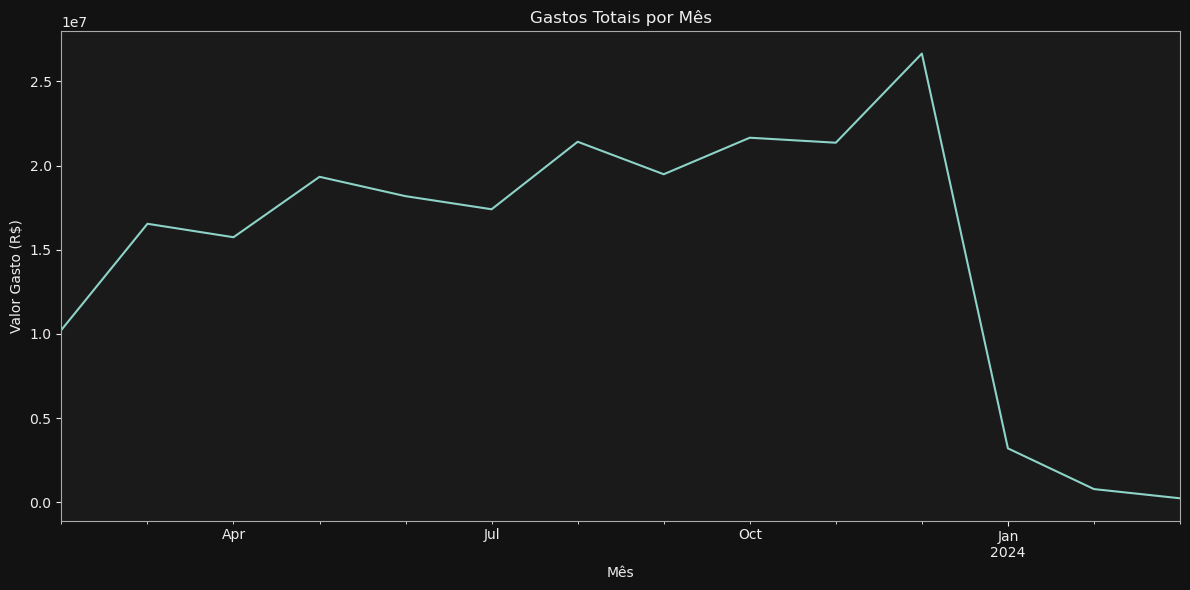

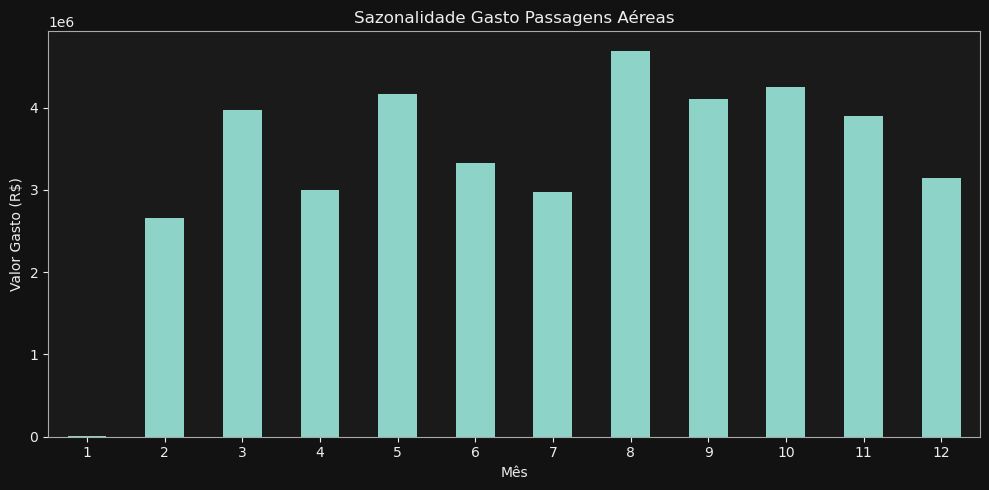

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#EEEEEE'
plt.rcParams['xtick.color'] = '#EEEEEE'
plt.rcParams['ytick.color'] = '#EEEEEE'
plt.rcParams['text.color'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['grid.color'] = '#555555'

ARQUIVO_DESPESAS = 'despesas_2023.csv'
ARQUIVO_SAIDA_EVOLUCAO = 'analise_despesas_evolucao_mes.png'
ARQUIVO_SAIDA_PASSAGENS = 'analise_despesas_sazonalidade_passagens.png'

COL_DATA = 'dataDocumento'
COL_VALOR = 'valorLiquido'
COL_TIPO = 'tipoDespesa'
COL_CNPJ = 'cnpjCpfFornecedor'
COL_FORNECEDOR = 'nomeFornecedor'
COL_PASSAGEM_QUERY = 'PASSAGEM'

try:
    print(f"Carregando '{ARQUIVO_DESPESAS}'...")
    df_despesas_final = pd.read_csv(ARQUIVO_DESPESAS)
    print(f"Arquivo '{ARQUIVO_DESPESAS}' carregado com {len(df_despesas_final):,} linhas.")
except FileNotFoundError:
    print(f"ERRO: Arquivo '{ARQUIVO_DESPESAS}' não encontrado.")
    print("Verifique se o script está na mesma pasta que o arquivo CSV.")
    sys.exit()
except Exception as e:
    print(f"Erro ao carregar o CSV: {e}")
    sys.exit()

if not df_despesas_final.empty:
    print("\n--- Análise: Despesas Parlamentares (CEAP) ---")

    if COL_DATA not in df_despesas_final.columns:
        print(f"ERRO CRÍTICO: A coluna de data '{COL_DATA}' não foi encontrada. Análise interrompida.")
        sys.exit()

    try:
        df_despesas_final[COL_DATA] = pd.to_datetime(df_despesas_final[COL_DATA])
        print("Data convertida com sucesso.")
    except (ValueError, TypeError):
        print("Formato de data não padrão detectado. Tentando formato 'dd/mm/AAAA'.")
        df_despesas_final[COL_DATA] = pd.to_datetime(df_despesas_final[COL_DATA], format='%d/%m/%Y', errors='coerce')
    
    df_despesas_final.dropna(subset=[COL_DATA], inplace=True)

    if COL_VALOR not in df_despesas_final.columns:
        print(f"ERRO CRÍTICO: A coluna de valor '{COL_VALOR}' não foi encontrada. Análise interrompida.")
        sys.exit()

    df_despesas_final[COL_VALOR] = pd.to_numeric(df_despesas_final[COL_VALOR], errors='coerce')
    df_despesas_final.dropna(subset=[COL_VALOR], inplace=True)
    
    if df_despesas_final.empty:
         print("Após a limpeza, o DataFrame ficou vazio. Nenhuma análise a ser feita.")
         sys.exit()

    gasto_por_categoria = df_despesas_final.groupby(COL_TIPO)[COL_VALOR].sum().sort_values(ascending=False)
    print("\nGasto Total por Categoria (Top 5):")
    print(gasto_por_categoria.head().apply(lambda x: f"R$ {x:,.2f}"))

    gastos_por_mes = df_despesas_final.set_index(COL_DATA).resample('M')[COL_VALOR].sum()
    
    print("\nEvolução dos Gastos Totais (Últimos 5 meses):")
    print(gastos_por_mes.tail().apply(lambda x: f"R$ {x:,.2f}"))
    
    plt.figure(figsize=(12, 6))
    gastos_por_mes.plot(title="Gastos Totais por Mês")
    plt.xlabel("Mês")
    plt.ylabel("Valor Gasto (R$)")
    plt.tight_layout()
    plt.savefig(ARQUIVO_SAIDA_EVOLUCAO)
    print(f"Gráfico '{ARQUIVO_SAIDA_EVOLUCAO}' salvo.")

    if COL_CNPJ in df_despesas_final.columns and COL_FORNECEDOR in df_despesas_final.columns:
        gasto_por_fornecedor = df_despesas_final[df_despesas_final[COL_CNPJ].notna()].groupby(COL_FORNECEDOR)[COL_VALOR].sum().sort_values(ascending=False)
        print("\nFornecedores com Maior Recebimento (Top 5):")
        print(gasto_por_fornecedor.head().apply(lambda x: f"R$ {x:,.2f}"))
    else:
        print(f"\nAviso: Não foi possível analisar fornecedores. Colunas '{COL_CNPJ}' ou '{COL_FORNECEDOR}' não encontradas.")

    df_passagens = df_despesas_final[df_despesas_final[COL_TIPO].str.contains(COL_PASSAGEM_QUERY, case=False, na=False)].copy()
    
    if not df_passagens.empty:
        df_passagens['mes'] = df_passagens[COL_DATA].dt.month
        gasto_passagens_mes = df_passagens.groupby('mes')[COL_VALOR].sum().sort_index()
        print("\nTotal Gasto com Passagens por Mês:")
        print(gasto_passagens_mes.apply(lambda x: f"R$ {x:,.2f}"))
        
        plt.figure(figsize=(10, 5))
        gasto_passagens_mes.plot(kind='bar', title="Sazonalidade Gasto Passagens Aéreas")
        plt.xlabel("Mês")
        plt.ylabel("Valor Gasto (R$)")
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.savefig(ARQUIVO_SAIDA_PASSAGENS)
        print(f"Gráfico '{ARQUIVO_SAIDA_PASSAGENS}' salvo.")
    else:
        print("\nNenhuma despesa de passagem encontrada para análise de sazonalidade.")
else:
    print("O DataFrame 'df_despesas_final' está vazio. Análise pulada.")

--- 1. Análise: Sobre os Deputados ---

[Distribuição por Partido]
siglaPartido
PL              86
PT              67
UNIÃO           59
PP              49
PSD             46
REPUBLICANOS    46
MDB             42
PDT             17
PSB             16
PODE            16
PSDB            14
PSOL            12
PCdoB            9
AVANTE           8
NOVO             5
Name: count, dtype: int64


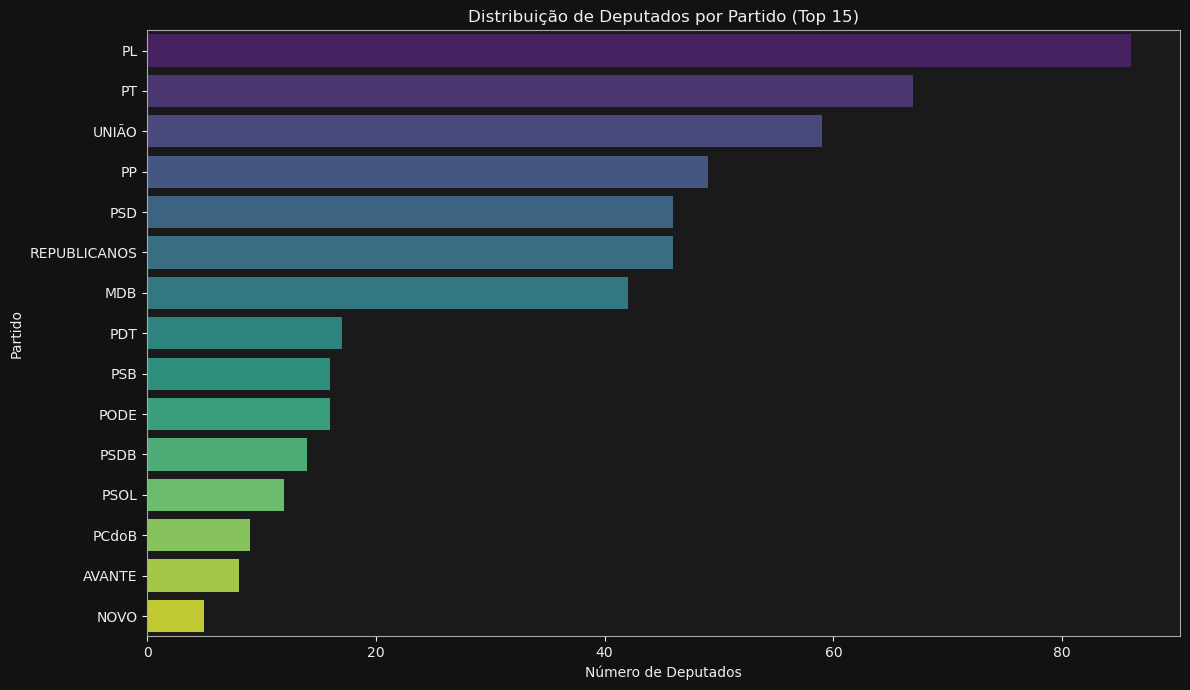


[Distribuição por Estado (UF)]
siglaUf
SP    70
MG    53
RJ    46
BA    39
RS    31
PR    30
PE    25
CE    22
MA    18
GO    17
PA    17
SC    16
PB    12
PI    10
ES    10
AL     9
DF     8
AP     8
AM     8
TO     8
RR     8
AC     8
RN     8
MS     8
MT     8
RO     8
SE     8
Name: count, dtype: int64


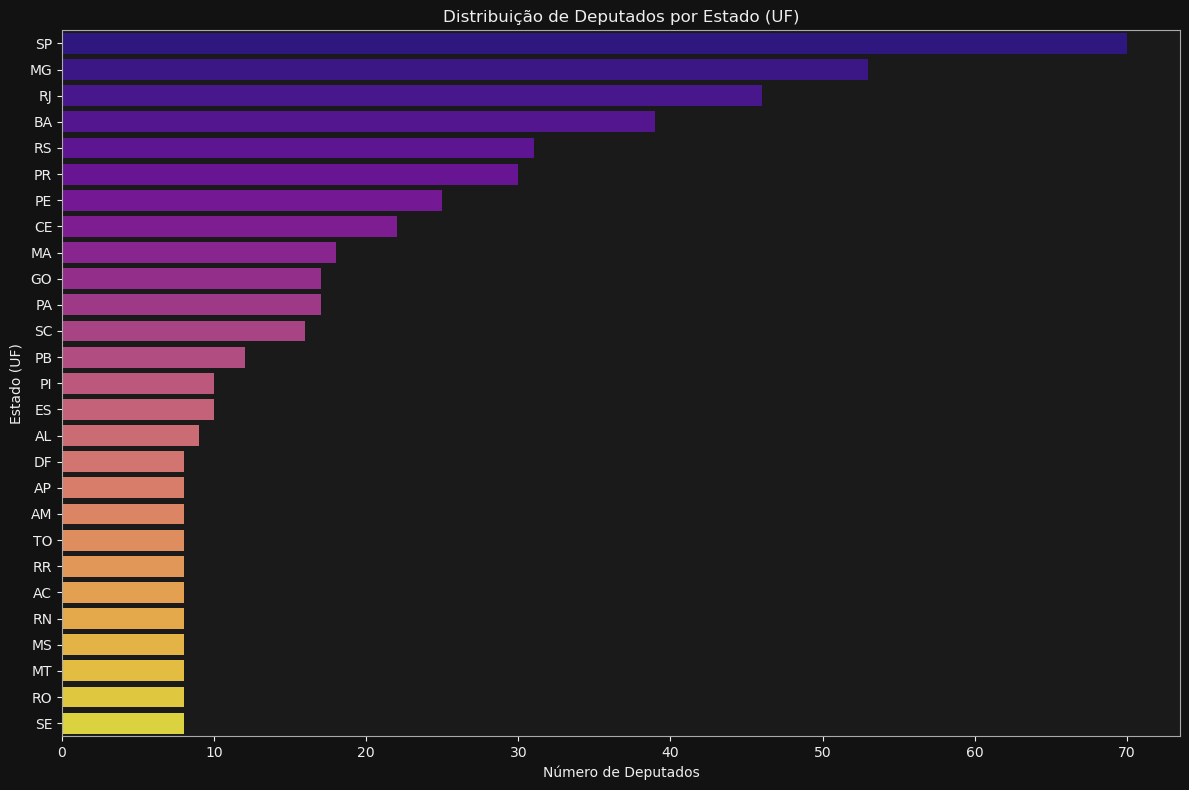

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#EEEEEE'
plt.rcParams['xtick.color'] = '#EEEEEE'
plt.rcParams['ytick.color'] = '#EEEEEE'
plt.rcParams['text.color'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['grid.color'] = '#555555'

if not df_deputados_final.empty:
    print("--- 1. Análise: Sobre os Deputados ---")

    try:
        if 'siglaPartido' not in df_deputados_final.columns:
            print("Descompactando 'ultimoStatus' para extrair partido e UF...")
            
            if isinstance(df_deputados_final['ultimoStatus'].iloc[0], dict):
                status_normalizado = df_deputados_final['ultimoStatus'].apply(pd.Series)
            else:
                status_normalizado = df_deputados_final['ultimoStatus'].apply(lambda x: pd.Series(eval(x)))
                
            df_deputados_final['siglaPartido'] = status_normalizado['siglaPartido']
            df_deputados_final['siglaUf'] = status_normalizado['siglaUf']
            print("'siglaPartido' e 'siglaUf' extraídas com sucesso.")
            
    except Exception as e:
        print(f"Erro ao tentar descompactar 'ultimoStatus': {e}")
        print("Verifique se o arquivo 'deputados_detalhados.json' foi carregado corretamente.")
        df_deputados_final = pd.DataFrame()

    if not df_deputados_final.empty and 'siglaPartido' in df_deputados_final.columns:
        
        print("\n[Distribuição por Partido]")
        dist_partido = df_deputados_final['siglaPartido'].value_counts()
        print(dist_partido.head(15))
        
        plt.figure(figsize=(12, 7))
        sns.barplot(x=dist_partido.head(15).values, y=dist_partido.head(15).index, palette="viridis")
        plt.title('Distribuição de Deputados por Partido (Top 15)')
        plt.xlabel('Número de Deputados')
        plt.ylabel('Partido')
        plt.tight_layout()
        plt.show()

        print("\n[Distribuição por Estado (UF)]")
        dist_estado = df_deputados_final['siglaUf'].value_counts()
        print(dist_estado)

        plt.figure(figsize=(12, 8))
        sns.barplot(x=dist_estado.values, y=dist_estado.index, palette="plasma")
        plt.title('Distribuição de Deputados por Estado (UF)')
        plt.xlabel('Número de Deputados')
        plt.ylabel('Estado (UF)')
        plt.tight_layout()
        plt.show()
        
    elif 'siglaPartido' not in df_deputados_final.columns:
        print("Análise pulada, pois as colunas 'siglaPartido' e 'siglaUf' não puderam ser criadas.")

else:
    print("O DataFrame 'df_deputados_final' está vazio. Pule esta análise.")

Carregando 'deputados.csv'...
Carregando todas as despesas (despesas_*.csv)...
Carregando proposições unificadas (proposicoes_detalhadas_UNIFICADAS.json)...

--- Iniciando Análise: Correlação Gasto vs. Produtividade (TODOS OS ANOS) ---
Preparando dados de deputados (extraindo partido)...
Preparando dados de despesas (convertendo valor e limpando)...
Agregando gastos por deputado (somando todos os anos)...
Agregando produtividade por deputado (de proposições unificadas)...
Cruzando dados de deputados, gastos e produtividade...
Limpando dados finais...

Coeficiente de Correlação (Pearson - Todos os Anos): 0.0993
Gerando gráfico de dispersão...
Gráfico salvo como 'correlacao_gasto_produtividade_TODOS_ANOS.png'


--- Análise Agregada por Partido ---

--- Partidos com MAIOR GASTO MÉDIO por Deputado ---
              numero_deputados  gasto_medio_dep  proposicoes_media_dep  gasto_total  proposicoes_total
siglaPartido                                                                            

/home/maju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/maju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Gráfico de partidos salvo como 'analise_partidos_gasto_produtividade_TODOS_ANOS.png'


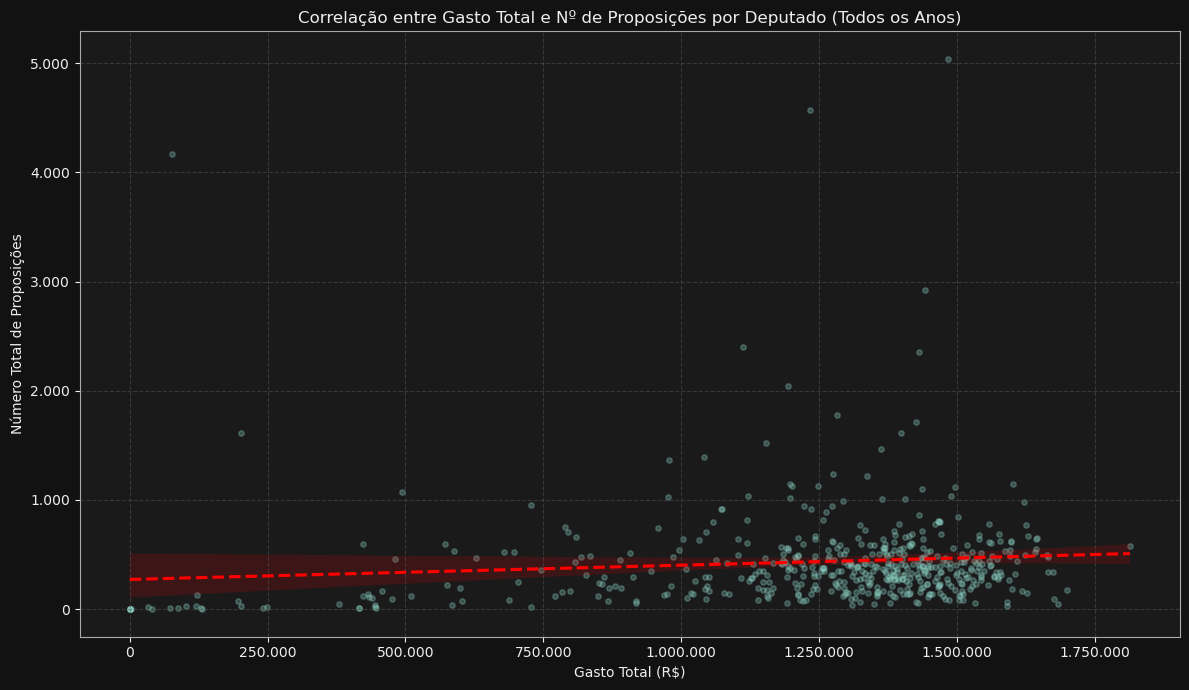

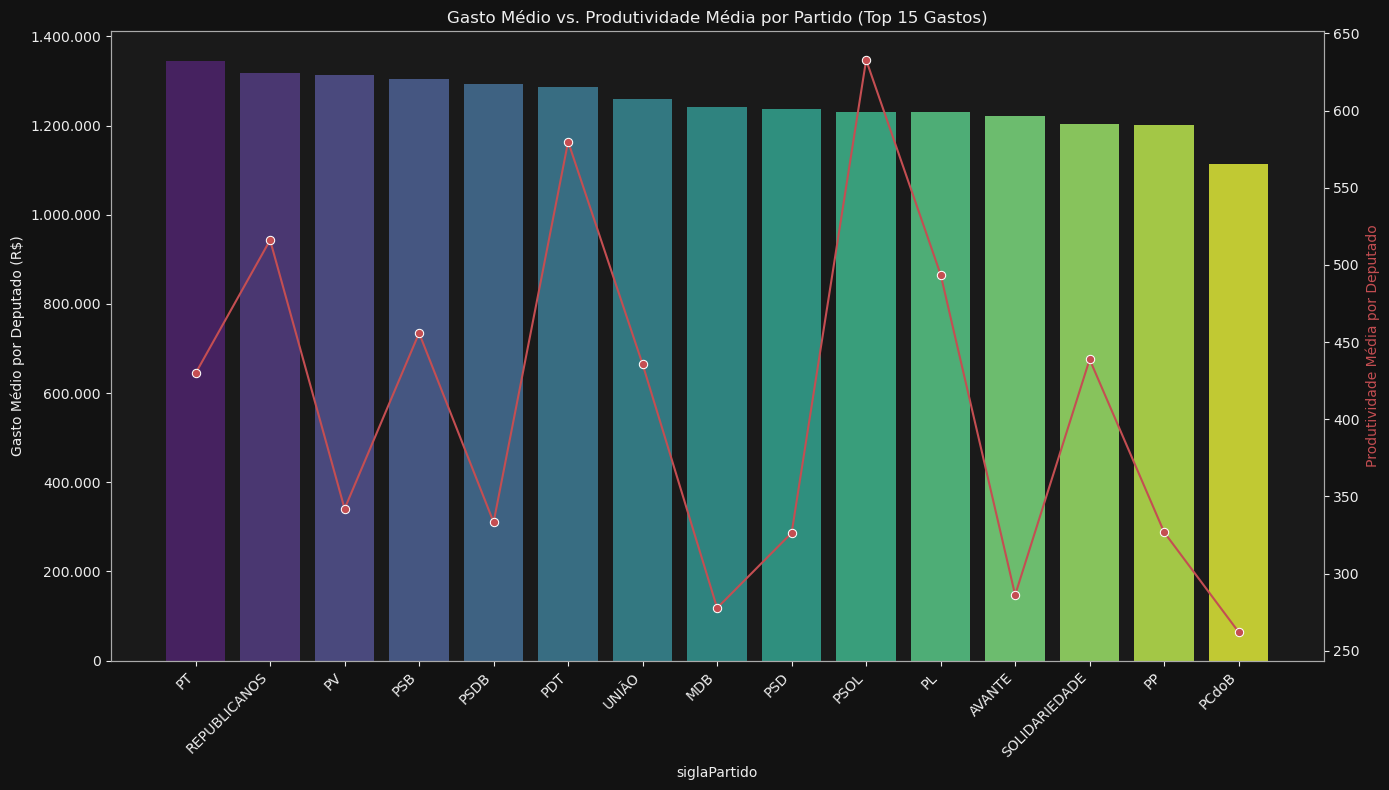

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import sys
from pandas import json_normalize
import glob

def formatar_milhar(x, pos):
    return f'{x:,.0f}'.replace(',', '.')

def extrair_id_autor(autor_dict):
    if isinstance(autor_dict, dict):
        uri = autor_dict.get('uri')
        if uri:
            try:
                return int(uri.split('/')[-1])
            except (ValueError, TypeError):
                return None
    return None

plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#EEEEEE'
plt.rcParams['xtick.color'] = '#EEEEEE'
plt.rcParams['ytick.color'] = '#EEEEEE'
plt.rcParams['text.color'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['grid.color'] = '#555555'

ARQUIVO_DEPUTADOS = 'deputados.csv'
PADRAO_DESPESAS = 'despesas_*.csv'
ARQUIVO_PROPOSICOES_UNIFICADO = 'proposicoes_detalhadas_UNIFICADAS.json'

COL_ID_DEPUTADO = 'id'
COL_ID_DESPESAS = 'idDeputado'
COL_VALOR_DESPESAS = 'valorLiquido'
COL_ID_PROPOSICOES = 'autor_id_uri'
COL_NOME_DEPUTADO = 'nomeCivil'


try:
    print(f"Carregando '{ARQUIVO_DEPUTADOS}'...")
    if ARQUIVO_DEPUTADOS.lower().endswith('.csv'):
        df_deputados_final = pd.read_csv(ARQUIVO_DEPUTADOS)
    else:
        df_deputados_final = pd.read_json(ARQUIVO_DEPUTADOS)
    df_deputados_final[COL_ID_DEPUTADO] = pd.to_numeric(df_deputados_final[COL_ID_DEPUTADO], errors='coerce').astype('Int64')

    print(f"Carregando todas as despesas ({PADRAO_DESPESAS})...")
    lista_arquivos_despesas = glob.glob(PADRAO_DESPESAS)
    if not lista_arquivos_despesas:
        raise FileNotFoundError(f"Nenhum arquivo de despesa encontrado com o padrão: {PADRAO_DESPESAS}")
    
    lista_df_despesas = [pd.read_csv(f) for f in lista_arquivos_despesas]
    df_despesas_final = pd.concat(lista_df_despesas, ignore_index=True)
    
    print(f"Carregando proposições unificadas ({ARQUIVO_PROPOSICOES_UNIFICADO})...")
    df_proposicoes_final = pd.read_json(ARQUIVO_PROPOSICOES_UNIFICADO)

except FileNotFoundError as e:
    print(f"\n--- ERRO CRÍTICO (Arquivo Não Encontrado) ---")
    print(f"Arquivo não encontrado: {e.filename}")
    print("O script não pode continuar. Verifique se os arquivos estão no mesmo diretório.")
    sys.exit()
except Exception as e:
    print(f"\n--- ERRO CRÍTICO (Carregamento) ---")
    print(f"Ocorreu um erro ao carregar os arquivos: {e}")
    sys.exit()


print("\n--- Iniciando Análise: Correlação Gasto vs. Produtividade (TODOS OS ANOS) ---")

if df_deputados_final.empty or df_despesas_final.empty or df_proposicoes_final.empty:
    print("Não há dados suficientes para realizar a análise. Terminando.")
    sys.exit()

try:
    print("Preparando dados de deputados (extraindo partido)...")
    if 'siglaPartido' not in df_deputados_final.columns:
        if 'ultimoStatus' in df_deputados_final.columns:
            try:
                status_normalizado = df_deputados_final['ultimoStatus'].apply(lambda x: pd.Series(x) if isinstance(x, dict) else pd.Series(eval(x)))
                df_deputados_final['siglaPartido'] = status_normalizado['siglaPartido']
            except Exception:
                 df_deputados_final['siglaPartido'] = 'N/A'
        else:
            df_deputados_final['siglaPartido'] = 'N/A'
            
    df_deputados_base = df_deputados_final.dropna(subset=[COL_ID_DEPUTADO]).copy()
 
    print("Preparando dados de despesas (convertendo valor e limpando)...")
    df_despesas_final[COL_VALOR_DESPESAS] = pd.to_numeric(df_despesas_final[COL_VALOR_DESPESAS], errors='coerce')
    df_despesas_limpo = df_despesas_final.dropna(subset=[COL_VALOR_DESPESAS, COL_ID_DESPESAS])
    
    df_despesas_limpo[COL_ID_DESPESAS] = pd.to_numeric(df_despesas_limpo[COL_ID_DESPESAS], errors='coerce').astype('Int64')

    print("Agregando gastos por deputado (somando todos os anos)...")
    gastos_por_deputado = df_despesas_limpo.groupby(COL_ID_DESPESAS)[COL_VALOR_DESPESAS].sum().reset_index()
    gastos_por_deputado = gastos_por_deputado.rename(columns={COL_VALOR_DESPESAS: 'total_gasto'})
    
    print("Agregando produtividade por deputado (de proposições unificadas)...")
    df_prop_exploded = df_proposicoes_final.explode('autores')
    df_prop_exploded = df_prop_exploded.dropna(subset=['autores'])
    
    df_prop_exploded[COL_ID_PROPOSICOES] = df_prop_exploded['autores'].apply(extrair_id_autor)
    df_prop_exploded = df_prop_exploded.dropna(subset=[COL_ID_PROPOSICOES])
    
    df_prop_exploded[COL_ID_PROPOSICOES] = df_prop_exploded[COL_ID_PROPOSICOES].astype('Int64')
    
    produtividade_por_deputado = df_prop_exploded.groupby(COL_ID_PROPOSICOES).size().reset_index(name='total_proposicoes')

    print("Cruzando dados de deputados, gastos e produtividade...")
    df_analise = df_deputados_base.copy()

    df_analise = pd.merge(df_analise, gastos_por_deputado, left_on=COL_ID_DEPUTADO, right_on=COL_ID_DESPESAS, how='left')
    df_analise = pd.merge(df_analise, produtividade_por_deputado, left_on=COL_ID_DEPUTADO, right_on=COL_ID_PROPOSICOES, how='left')

    print("Limpando dados finais...")
    df_analise['total_gasto'] = df_analise['total_gasto'].fillna(0)
    df_analise['total_proposicoes'] = df_analise['total_proposicoes'].fillna(0)
    
    df_analise.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
    
    df_analise = df_analise.drop(columns=[COL_ID_DESPESAS, COL_ID_PROPOSICOES], errors='ignore')
    
    df_analise['total_proposicoes'] = df_analise['total_proposicoes'].astype(int)

    if not df_analise.empty:
        correlacao = df_analise['total_gasto'].corr(df_analise['total_proposicoes'])
        print(f"\nCoeficiente de Correlação (Pearson - Todos os Anos): {correlacao:.4f}")
    else:
        print("\nNão foi possível calcular a correlação, sem dados para análise.")
        sys.exit()
    
    print("Gerando gráfico de dispersão...")
    plt.figure(figsize=(12, 7))
    sns.regplot(data=df_analise, x='total_gasto', y='total_proposicoes', scatter_kws={'alpha':0.3, 's':15}, line_kws={'color':'red', 'linestyle':'--'})
    plt.title('Correlação entre Gasto Total e Nº de Proposições por Deputado (Todos os Anos)', color='#EEEEEE')
    plt.xlabel('Gasto Total (R$)', color='#EEEEEE')
    plt.ylabel('Número Total de Proposições', color='#EEEEEE')
    plt.grid(True, linestyle='--', alpha=0.5, color='#555555')
    
    plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_milhar))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_milhar))
    
    plt.tight_layout()
    plt.savefig('correlacao_gasto_produtividade_TODOS_ANOS.png')
    print("Gráfico salvo como 'correlacao_gasto_produtividade_TODOS_ANOS.png'")

    # Relatórios Top 10
    colunas_relatorio = [COL_NOME_DEPUTADO, 'siglaPartido', 'total_gasto', 'total_proposicoes']
    colunas_existem = all(col in df_analise.columns for col in colunas_relatorio)
    
    if colunas_existem:
        print("\n--- Deputados com Maiores Gastos ---")
        print(df_analise.sort_values('total_gasto', ascending=False)[colunas_relatorio].head(10).to_string())

        print("\n--- Deputados com Mais Proposições (Produtividade) ---")
        print(df_analise.sort_values('total_proposicoes', ascending=False)[colunas_relatorio].head(10).to_string())

    print("\n\n--- Análise Agregada por Partido ---")

    agregacao_partido = {
        'total_gasto': ['sum', 'mean'],
        'total_proposicoes': ['sum', 'mean'],
        COL_ID_DEPUTADO: 'count'
    }
    
    if 'siglaPartido' in df_analise.columns:
        df_partidos = df_analise.groupby('siglaPartido').agg(agregacao_partido)
    else:
        print("Coluna 'siglaPartido' ausente. Pulando análise por partido.")
        sys.exit()

    df_partidos.columns = [
        'gasto_total', 'gasto_medio_dep',
        'proposicoes_total', 'proposicoes_media_dep',
        'numero_deputados'
    ]

    if 'N/A' in df_partidos.index:
        df_partidos = df_partidos.drop('N/A')

    colunas_relatorio_partido = ['numero_deputados', 'gasto_medio_dep', 'proposicoes_media_dep', 'gasto_total', 'proposicoes_total']

    print("\n--- Partidos com MAIOR GASTO MÉDIO por Deputado ---")
    print(df_partidos.sort_values('gasto_medio_dep', ascending=False)[colunas_relatorio_partido].head(10).to_string(float_format="%.2f"))

    print("\n--- Partidos com MAIOR PRODUTIVIDADE MÉDIA por Deputado ---")
    print(df_partidos.sort_values('proposicoes_media_dep', ascending=False)[colunas_relatorio_partido].head(10).to_string(float_format="%.2f"))

    print("\n--- Partidos com MAIOR GASTO TOTAL ---")
    print(df_partidos.sort_values('gasto_total', ascending=False)[colunas_relatorio_partido].head(10).to_string(float_format="%.2f"))
    
    print("\nGerando gráficos da análise por partido...")
    
    df_grafico_partidos = df_partidos.sort_values('gasto_medio_dep', ascending=False).head(15)
    
    if not df_grafico_partidos.empty:
        plt.figure(figsize=(14, 8))
        ax1 = sns.barplot(x=df_grafico_partidos.index, y='gasto_medio_dep', data=df_grafico_partidos, palette='viridis')
        ax1.set_ylabel('Gasto Médio por Deputado (R$)', color='#EEEEEE')
        ax1.set_title('Gasto Médio vs. Produtividade Média por Partido (Top 15 Gastos)', color='#EEEEEE')
        plt.xticks(rotation=45, ha='right', color='#EEEEEE')
        
        ax2 = ax1.twinx()
        sns.lineplot(x=df_grafico_partidos.index, y='proposicoes_media_dep', data=df_grafico_partidos, ax=ax2, color='#c44e52', marker='o', sort=False)
        ax2.set_ylabel('Produtividade Média por Deputado', color='#c44e52')

        ax1.yaxis.set_major_formatter(FuncFormatter(formatar_milhar))
        ax2.yaxis.set_major_formatter(FuncFormatter(formatar_milhar))
        
        plt.grid(False)
        plt.tight_layout()
        plt.savefig('analise_partidos_gasto_produtividade_TODOS_ANOS.png')
        print("Gráfico de partidos salvo como 'analise_partidos_gasto_produtividade_TODOS_ANOS.png'")
    else:
        print("Não foi possível gerar o gráfico de partidos (sem dados).")


except KeyError as e:
    print(f"\n--- ERRO! ---")
    print(f"Erro de Chave (KeyError): {e}")
    print("Isso significa que uma coluna essencial não foi encontrada.")
    print(f"Verifique se a coluna {e} existe nos seus arquivos (JSON/CSV).")
except Exception as e:
    print(f"\nOcorreu um erro inesperado: {e}")

Gerando: Gráfico 2 - Evolução dos Gastos no Tempo


/home/maju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/maju/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Gráfico 'grafico_2_evolucao_gastos.png' salvo com sucesso.


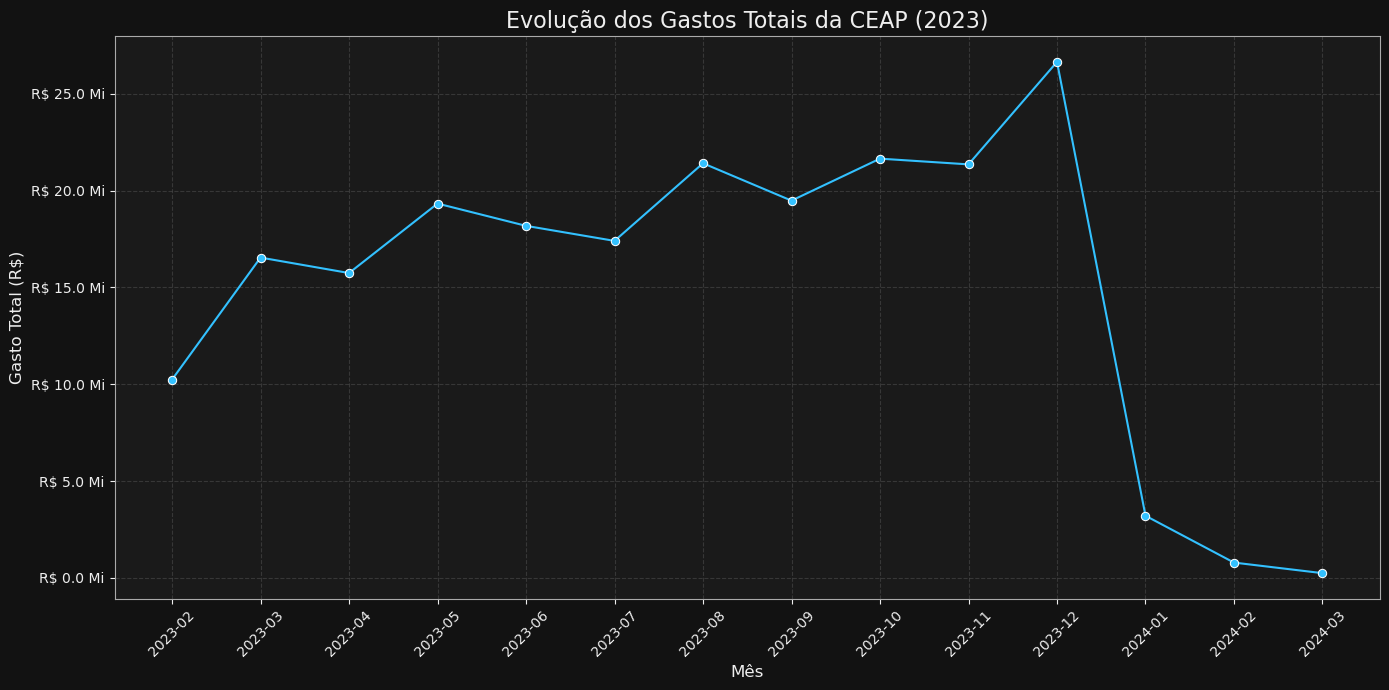

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import sys

plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#EEEEEE'
plt.rcParams['xtick.color'] = '#EEEEEE'
plt.rcParams['ytick.color'] = '#EEEEEE'
plt.rcParams['text.color'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['grid.color'] = '#555555'

ARQUIVO_DESPESAS = 'despesas_2023.csv' 
ARQUIVO_SAIDA = 'grafico_2_evolucao_gastos.png'
COL_VALOR = 'valorLiquido'
COL_DATA = 'dataDocumento'

print("Gerando: Gráfico 2 - Evolução dos Gastos no Tempo")

try:
    df_despesas = pd.read_csv(ARQUIVO_DESPESAS)

    df_despesas[COL_VALOR] = pd.to_numeric(df_despesas[COL_VALOR], errors='coerce')
    
    if COL_DATA not in df_despesas.columns:
        raise KeyError(f"Coluna de data '{COL_DATA}' não encontrada.")
        
    df_despesas = df_despesas.dropna(subset=[COL_VALOR, COL_DATA])
    
    df_despesas[COL_DATA] = pd.to_datetime(df_despesas[COL_DATA], errors='coerce')
    df_despesas = df_despesas.dropna(subset=[COL_DATA])
    
    df_despesas['periodo'] = df_despesas[COL_DATA].dt.strftime('%Y-%m')

    gastos_por_mes = df_despesas.groupby('periodo')[COL_VALOR].sum().reset_index()
    gastos_por_mes = gastos_por_mes.sort_values('periodo')

    plt.figure(figsize=(14, 7))
    
    ax = sns.lineplot(x='periodo', y=COL_VALOR, data=gastos_por_mes, marker='o', color='#33C1FF')
    
    plt.title('Evolução dos Gastos Totais da CEAP (2023)', fontsize=16)
    plt.xlabel('Mês', fontsize=12)
    plt.ylabel('Gasto Total (R$)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)

    def formatar_milhao(y, pos):
        return f'R$ {y/1.e6:.1f} Mi'
    ax.yaxis.set_major_formatter(FuncFormatter(formatar_milhao))
    
    plt.tight_layout()
    plt.savefig(ARQUIVO_SAIDA)
    print(f"Gráfico '{ARQUIVO_SAIDA}' salvo com sucesso.")

except FileNotFoundError:
    print(f"ERRO: Arquivo '{ARQUIVO_DESPESAS}' não encontrado.")
except KeyError as e:
    print(f"ERRO: Coluna essencial não encontrada: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Composição de Gastos (Top 10 Deputados - Todos os Anos)
Carregando 'deputados.csv'...
Carregando e consolidando despesas de 'despesas_*.csv'...
Gráfico 'grafico_6_gastos_empilhados_consolidados.png' salvo com sucesso.


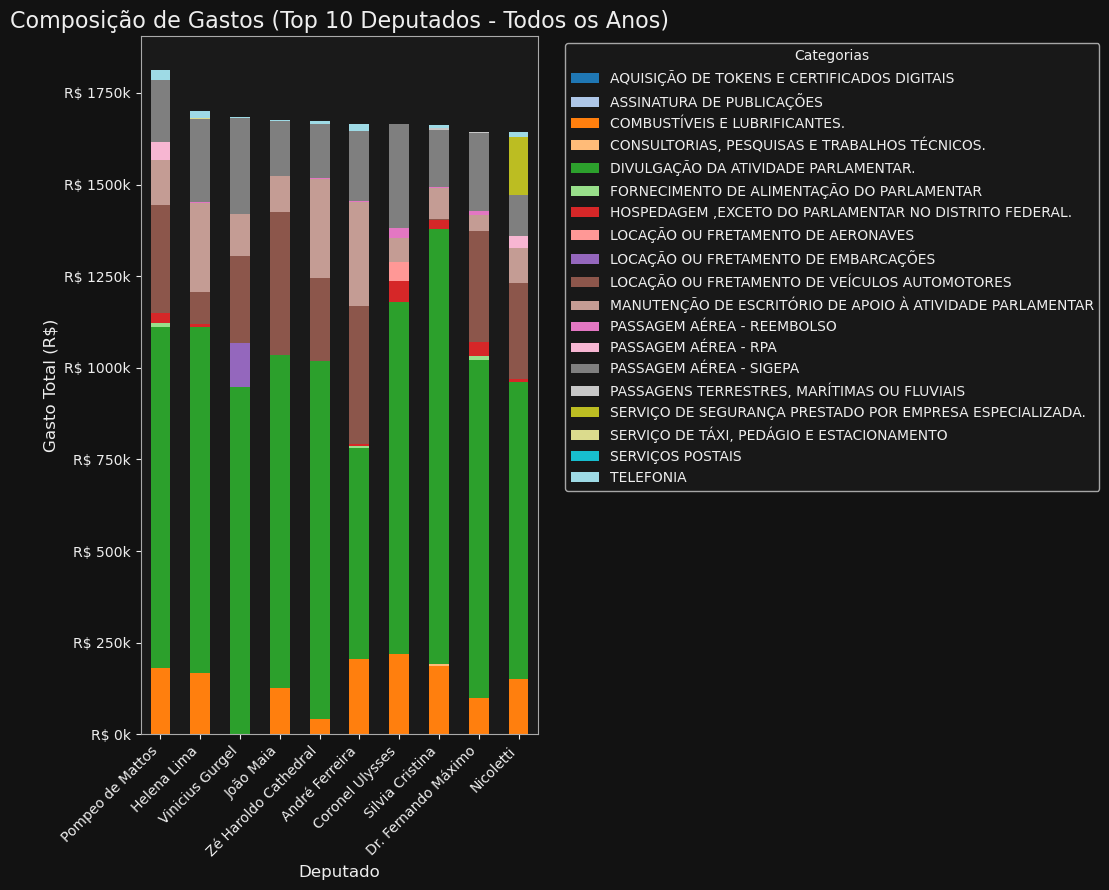

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import glob
from matplotlib.ticker import FuncFormatter

plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#EEEEEE'
plt.rcParams['xtick.color'] = '#EEEEEE'
plt.rcParams['ytick.color'] = '#EEEEEE'
plt.rcParams['text.color'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['grid.color'] = '#555555'

ARQUIVO_DEPUTADOS = 'deputados.csv'
PADRAO_DESPESAS = 'despesas_*.csv'

COL_NOME_DEPUTADO = 'nome' 

def formatar_milhar(y, pos):
    return f'R$ {y/1e3:.0f}k'

print("Composição de Gastos (Top 10 Deputados - Todos os Anos)")

try:
    print(f"Carregando '{ARQUIVO_DEPUTADOS}'...")
    df_deputados = pd.read_csv(ARQUIVO_DEPUTADOS)
    
    df_deputados_base = df_deputados[['id', COL_NOME_DEPUTADO]].dropna()
    
    print(f"Carregando e consolidando despesas de '{PADRAO_DESPESAS}'...")
    lista_arquivos_despesas = glob.glob(PADRAO_DESPESAS)
    if not lista_arquivos_despesas:
        raise FileNotFoundError(f"Nenhum arquivo de despesa encontrado com o padrão: {PADRAO_DESPESAS}")
        
    lista_df_despesas = [pd.read_csv(f) for f in lista_arquivos_despesas]
    df_despesas_final = pd.concat(lista_df_despesas, ignore_index=True)

    df_despesas_final['valorLiquido'] = pd.to_numeric(df_despesas_final['valorLiquido'], errors='coerce')
    df_despesas_limpo = df_despesas_final.dropna(subset=['valorLiquido', 'idDeputado', 'tipoDespesa'])
    
    df_despesas_limpo['idDeputado'] = df_despesas_limpo['idDeputado'].astype(df_deputados_base['id'].dtype)

    df_merged = pd.merge(df_despesas_limpo, df_deputados_base, left_on='idDeputado', right_on='id', how='left')
    
    df_merged = df_merged.dropna(subset=[COL_NOME_DEPUTADO])

    gastos_totais = df_merged.groupby(COL_NOME_DEPUTADO)['valorLiquido'].sum()
    top_10_gastadores_nomes = gastos_totais.nlargest(10).index
    
    df_top_10 = df_merged[df_merged[COL_NOME_DEPUTADO].isin(top_10_gastadores_nomes)]
    
    df_pivot = df_top_10.groupby([COL_NOME_DEPUTADO, 'tipoDespesa'])['valorLiquido'].sum().unstack().fillna(0)
    
    df_pivot = df_pivot.loc[top_10_gastadores_nomes]

    ax = df_pivot.plot(
        kind='bar', 
        stacked=True, 
        figsize=(14, 9), 
        cmap='tab20'
    )
    
    plt.title('Composição de Gastos (Top 10 Deputados - Todos os Anos)', fontsize=16)
    plt.xlabel('Deputado', fontsize=12)
    plt.ylabel('Gasto Total (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    plt.legend(title='Categorias', bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.yaxis.set_major_formatter(FuncFormatter(formatar_milhar))
    
    plt.tight_layout(rect=[0, 0, 0.8, 1])
    plt.savefig('grafico_6_gastos_empilhados_consolidados.png')
    print("Gráfico 'grafico_6_gastos_empilhados_consolidados.png' salvo com sucesso.")

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado: {e}")
    print("Este script precisa de 'deputados.csv' e de todos os 'despesas_*.csv'.")
except KeyError as e:
    print(f"ERRO: Coluna essencial não encontrada. Verifique se os arquivos CSV estão completos: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Carregando 'deputados.csv'...
Carregando e consolidando despesas de 'despesas_*.csv'...
Carregando 'proposicoes_detalhadas_UNIFICADAS.json'...
Mapeando o FacetGrid (pode demorar um pouco)...
Gráfico 'grafico_7_facetgrid_categorias.png' salvo com sucesso.


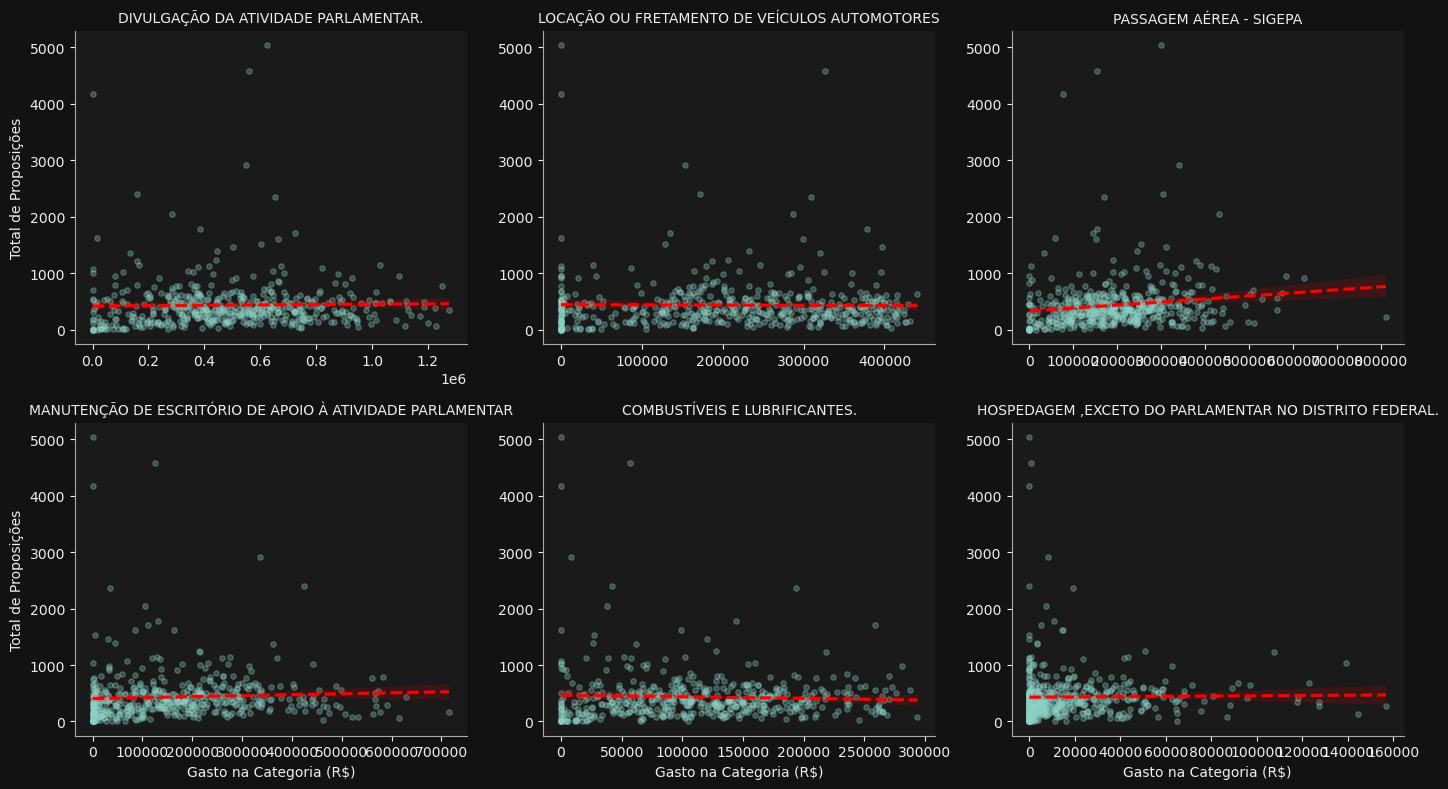

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import glob

# --- CONFIGURAÇÃO GLOBAL DE ESTILO ---
plt.style.use('dark_background')
plt.rcParams['axes.edgecolor'] = '#AAAAAA'
plt.rcParams['axes.labelcolor'] = '#EEEEEE'
plt.rcParams['xtick.color'] = '#EEEEEE'
plt.rcParams['ytick.color'] = '#EEEEEE'
plt.rcParams['text.color'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = '#121212'
plt.rcParams['axes.facecolor'] = '#1A1A1A'
plt.rcParams['grid.color'] = '#555555'

ARQUIVO_DEPUTADOS = 'deputados.csv'
PADRAO_DESPESAS = 'despesas_*.csv'
ARQUIVO_PROPOSICOES = 'proposicoes_detalhadas_UNIFICADAS.json'
ARQUIVO_SAIDA = 'grafico_7_facetgrid_categorias.png'

COL_ID_DEPUTADO = 'id'
COL_VALOR_DESPESAS = 'valorLiquido'
COL_TIPO_DESPESA = 'tipoDespesa'
COL_AUTORES = 'autores'
COL_ID_AUTOR = 'id_autor'
COL_PROPOSICOES = 'total_proposicoes'
COL_NOME_DEPUTADO = 'nome'

def extrair_id_autor(autor_dict):
    if isinstance(autor_dict, dict):
        uri = autor_dict.get('uri')
        if uri:
            try:
                # Retorna int para merge
                return int(uri.split('/')[-1])
            except Exception:
                return None
    return None

try:
    print(f"Carregando '{ARQUIVO_DEPUTADOS}'...")
    df_deputados = pd.read_csv(ARQUIVO_DEPUTADOS)
    df_deputados_base = df_deputados[[COL_ID_DEPUTADO, COL_NOME_DEPUTADO]].dropna()
    df_deputados_base[COL_ID_DEPUTADO] = df_deputados_base[COL_ID_DEPUTADO].astype('Int64')

    print(f"Carregando e consolidando despesas de '{PADRAO_DESPESAS}'...")
    lista_arquivos_despesas = glob.glob(PADRAO_DESPESAS)
    if not lista_arquivos_despesas:
        raise FileNotFoundError(f"Nenhum arquivo de despesa encontrado com o padrão: {PADRAO_DESPESAS}")
    lista_df_despesas = [pd.read_csv(f) for f in lista_arquivos_despesas]
    df_despesas = pd.concat(lista_df_despesas, ignore_index=True)

    print(f"Carregando '{ARQUIVO_PROPOSICOES}'...")
    df_proposicoes = pd.read_json(ARQUIVO_PROPOSICOES)

    df_despesas[COL_VALOR_DESPESAS] = pd.to_numeric(df_despesas[COL_VALOR_DESPESAS], errors='coerce')
    df_despesas_limpo = df_despesas.dropna(subset=[COL_VALOR_DESPESAS, 'idDeputado', COL_TIPO_DESPESA])
    df_despesas_limpo['idDeputado'] = df_despesas_limpo['idDeputado'].astype('Int64')

    df_prop_exploded = df_proposicoes.explode(COL_AUTORES).dropna(subset=[COL_AUTORES])
    df_prop_exploded[COL_ID_AUTOR] = df_prop_exploded[COL_AUTORES].apply(extrair_id_autor)
    df_prop_exploded = df_prop_exploded.dropna(subset=[COL_ID_AUTOR])
    df_prop_exploded[COL_ID_AUTOR] = df_prop_exploded[COL_ID_AUTOR].astype('Int64')
    
    produtividade_por_deputado = df_prop_exploded.groupby(COL_ID_AUTOR).size().reset_index(name=COL_PROPOSICOES)

    gastos_por_categoria = df_despesas_limpo.groupby(['idDeputado', COL_TIPO_DESPESA])[COL_VALOR_DESPESAS].sum().unstack().fillna(0)
    
    top_6_categorias = df_despesas_limpo.groupby(COL_TIPO_DESPESA)[COL_VALOR_DESPESAS].sum().nlargest(6).index
    gastos_por_categoria_top = gastos_por_categoria[top_6_categorias]

    df_analise = pd.merge(df_deputados_base, produtividade_por_deputado, left_on=COL_ID_DEPUTADO, right_on=COL_ID_AUTOR, how='left')
    df_analise = pd.merge(df_analise, gastos_por_categoria_top, left_on=COL_ID_DEPUTADO, right_index=True, how='left')
    
    df_analise[COL_PROPOSICOES] = df_analise[COL_PROPOSICOES].fillna(0)
    df_analise = df_analise.fillna(0)

    df_long = df_analise.melt(
        id_vars=[COL_ID_DEPUTADO, COL_PROPOSICOES],
        value_vars=top_6_categorias,
        var_name='categoria_despesa',
        value_name='gasto_na_categoria'
    )
    
    print("Mapeando o FacetGrid (pode demorar um pouco)...")
    
    g = sns.FacetGrid(
        data=df_long,
        col='categoria_despesa',
        col_wrap=3,
        height=4,
        aspect=1.2,
        sharex=False,
        sharey=False
    )
    
    g.map_dataframe(
        sns.regplot,
        x='gasto_na_categoria',
        y=COL_PROPOSICOES,
        scatter_kws={'alpha':0.3, 's':15},
        line_kws={'color':'red', 'linestyle':'--'}
    )

    g.set_titles("{col_name}")
    g.set_axis_labels("Gasto na Categoria (R$)", "Total de Proposições")
    g.tight_layout()
    
    plt.savefig(ARQUIVO_SAIDA)
    print(f"Gráfico '{ARQUIVO_SAIDA}' salvo com sucesso.")

except FileNotFoundError as e:
    print(f"ERRO: Arquivo não encontrado: {e.filename}. Verifique se rodou a coleta e a unificação.")
except KeyError as e:
    print(f"ERRO: Coluna essencial não encontrada: {e}. Verifique se os arquivos de dados estão completos.")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")